In [1]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GRU import GRU
from MLP import MLP

In [2]:
def generate_timeseries(batch_size, n_steps):
    f1, f2, offset1, offset2 = np.random.rand(4, batch_size,1)
    t = np.linspace(0,1, n_steps)
    series = 0.5*np.sin((t - offset1)*(f1*10 + 10))
    series += 0.2*np.sin((t - offset2)*(f2*20 + 20))
    series += 0.1*(np.random.randn(batch_size, n_steps) - 0.5)
    
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 64
series = generate_timeseries(10000, n_steps + 1)

X_train , y_train = series[0:7000, :n_steps], series[0:7000, -1]
X_val , y_val = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [4]:
X_train.shape

(7000, 64, 1)

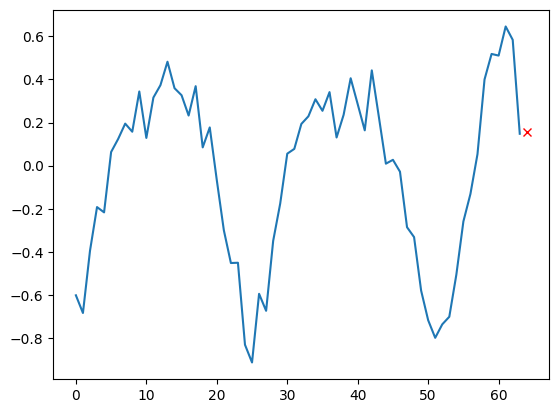

In [5]:
idx = np.random.randint(X_train.shape[0])
plt.plot(X_train[idx,:,:])
plt.plot(64, y_train[idx], marker='x',color='r')

In [6]:
def RMSE(preds, labels):
    return np.sqrt(np.mean((preds-labels)**2))

In [7]:
y_preds = X_train[:,-1,:]

In [8]:
RMSE(y_preds, y_train)

0.17847814

In [9]:
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [10]:
train_data[0][0].size()

torch.Size([64, 1])

In [11]:
model = MLP(n_steps, [64,32], 1).to('cpu')

In [12]:
model.fit(train_data, val_data, learning_rate = 3e-3, batch_size = 64)

Epoch	 Train Loss	 Val Loss	 Val RMSE
1	 3.814	 0.718	 0.15
2	 2.018	 0.672	 0.15
3	 1.919	 0.592	 0.14
4	 1.845	 0.639	 0.14
5	 1.793	 0.686	 0.15
6	 1.755	 0.591	 0.14
7	 1.703	 0.572	 0.13
8	 1.667	 0.586	 0.13
9	 1.647	 0.606	 0.14
10	 1.653	 0.575	 0.13
11	 1.638	 0.554	 0.13
12	 1.599	 0.579	 0.13
13	 1.598	 0.593	 0.14
14	 1.564	 0.562	 0.13
15	 1.570	 0.616	 0.14
16	 1.535	 0.585	 0.13
17	 1.493	 0.560	 0.13
18	 1.505	 0.559	 0.13
19	 1.489	 0.580	 0.13
20	 1.459	 0.545	 0.13
21	 1.438	 0.585	 0.14
22	 1.439	 0.582	 0.13
23	 1.430	 0.560	 0.13
24	 1.376	 0.623	 0.14
25	 1.376	 0.568	 0.13
26	 1.332	 0.585	 0.14
27	 1.315	 0.567	 0.13
28	 1.333	 0.561	 0.13
29	 1.310	 0.587	 0.14
30	 1.285	 0.616	 0.14
31	 1.258	 0.568	 0.13
32	 1.239	 0.590	 0.14
33	 1.277	 0.582	 0.13
34	 1.224	 0.568	 0.13
35	 1.198	 0.581	 0.13
36	 1.223	 0.576	 0.13
37	 1.186	 0.591	 0.13
38	 1.184	 0.568	 0.13
39	 1.160	 0.591	 0.14
40	 1.145	 0.634	 0.14
41	 1.148	 0.577	 0.13
42	 1.143	 0.576	 0.13
43	 1

In [13]:
model =  GRU(1,16,2,n_outputs=1)
model.fit(train_data,val_data, learning_rate = 3e-3, batch_size = 64)

Epoch	 Train Loss	 Val Loss	 Val RMSE
1	 7.294	 0.749	 0.15
2	 2.365	 0.726	 0.15
3	 2.311	 0.725	 0.15
4	 2.288	 0.701	 0.15
5	 2.238	 0.755	 0.15
6	 2.263	 0.673	 0.15
7	 2.202	 0.674	 0.14
8	 2.164	 0.663	 0.14
9	 2.147	 0.643	 0.14
10	 2.114	 0.654	 0.14
11	 2.137	 0.643	 0.14
12	 2.111	 0.682	 0.14
13	 2.078	 0.660	 0.14
14	 2.088	 0.636	 0.14
15	 2.106	 0.664	 0.14
16	 2.060	 0.619	 0.14
17	 2.052	 0.631	 0.14
18	 2.023	 0.619	 0.14
19	 2.003	 0.625	 0.14
20	 1.999	 0.614	 0.14
21	 2.009	 0.640	 0.14
22	 1.976	 0.624	 0.14
23	 1.969	 0.633	 0.14
24	 1.926	 0.608	 0.14
25	 1.906	 0.579	 0.13
26	 1.891	 0.580	 0.14
27	 1.844	 0.563	 0.13
28	 1.829	 0.566	 0.13
29	 1.805	 0.554	 0.13
30	 1.787	 0.555	 0.13
31	 1.814	 0.554	 0.13
32	 1.784	 0.571	 0.13
33	 1.769	 0.542	 0.13
34	 1.772	 0.548	 0.13
35	 1.742	 0.532	 0.13
36	 1.741	 0.532	 0.13
37	 1.736	 0.566	 0.13
38	 1.713	 0.539	 0.13
39	 1.704	 0.535	 0.13
40	 1.652	 0.537	 0.13
41	 1.652	 0.526	 0.13
42	 1.622	 0.518	 0.13
43	 1